Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the csv file using pandas

In [14]:
df = pd.read_csv("heart_2020_cleaned.csv")
#Here, df is a DataFrame that contains the data read from the CSV file

In [15]:
#showing top 5 entries of all columns
print(df.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [16]:
df['AgeCategory'].replace('80 or older', '80+', inplace=True)

In [21]:
df['Estimated Age'] = df['AgeCategory'].apply(lambda x: int(x.split("-")[0]) + int(x.split("-")[1]))/2

In [7]:
#Creating a function to calculate the mean of a column
def mean_of_column(df, column_name):
    return df[column_name].mean()

In [8]:
#Using the function to calculate the mean of a column
mean_bmi = mean_of_column(df, "BMI")
print("Mean of BMI: ", mean_bmi)

Mean of BMI:  56.650797041852655


In [39]:
# Use a list comprehension to select only rows where a certain condition is met
diabetic_patients = df[df['Diabetic'] == 'Yes']

In [36]:
# Using a dictionary to map the values of 'Sex' column
sex_map = {'Female': 0, 'Male': 1}
df['Sex'] = df['Sex'].map(sex_map)

In [37]:
# Using a dictionary to map the values of 'PhysicalActivity' column
activity_map = {'No': 0, 'Yes': 1}
df['PhysicalActivity'] = df['PhysicalActivity'].map(activity_map)

In [38]:
# Using a dictionary to group the data by a certain column
grouped_data = df.groupby('HeartDisease').mean()

print(grouped_data)

                    BMI  PhysicalHealth  MentalHealth  Sex  PhysicalActivity  \
HeartDisease                                                                   
No            28.224658        2.956416      3.828778  NaN               NaN   
Yes           29.401592        7.808242      4.641764  NaN               NaN   

              SleepTime  Estimated Age  
HeartDisease                            
No             7.093416      53.739825  
Yes            7.136156      69.759361  


In [23]:
# Creating a class for visualization of the data as bar plot or histogram
class Visualization:
    def __init__(self, dataframe):
        self.df = dataframe
    def hist_plot(self, column_name):
        plt.hist(self.df[column_name])
        plt.xlabel(column_name)
        plt.ylabel("Frequency")
        plt.show()
    def bar_plot(self, column_name):
        plt.bar(self.df[column_name].unique(), self.df[column_name].value_counts())
        plt.xlabel(column_name)
        plt.ylabel("Count")
        plt.show()

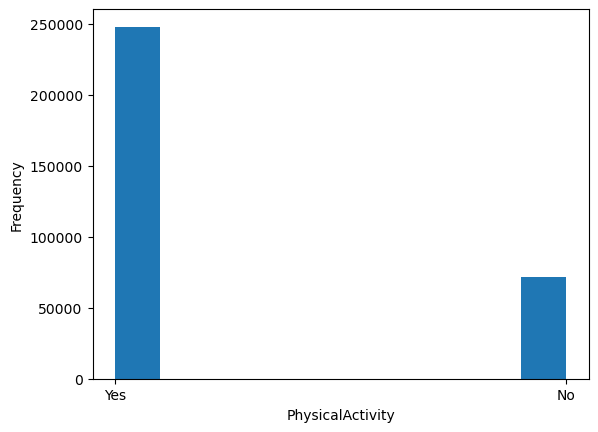

In [29]:
#using the class
viz = Visualization(df)
viz.hist_plot("PhysicalActivity")

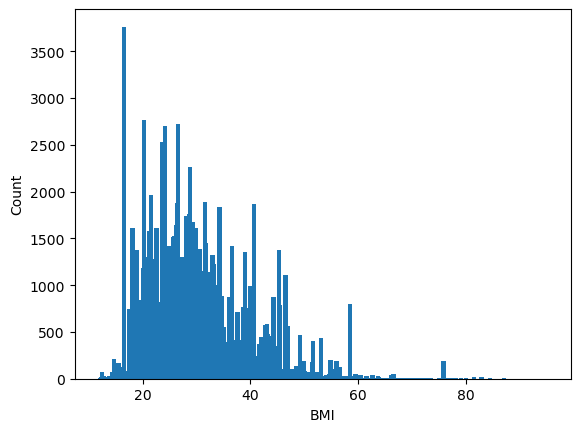

In [28]:
#using the class
viz = Visualization(df)
viz.bar_plot("BMI")